<a href="https://colab.research.google.com/github/sigma-wbi/Section_1_Project/blob/main/Section_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project1
# **Part 1. 데이터 정제**

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
# 데이터셋의 결측값이나 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
# 중복값 확인, 제거
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True)
df.drop(['index'],axis = 1,inplace = True)
#df.drop(['level_0'],axis = 1,inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


`data cleaning 필요`
1. Year, Genre, Publisher 에 결측값이 존재 -> 전체 삭제할 것인지 매꿔서 사용할 수 있는 데이터인지 파악</br>
2. Year의 데이터 타입을 int로 , 판매량들의 데이터 타입을 float로 바꿔야 이후 수치적 연산에 적용가능

In [7]:
# 결측치 제거
df.dropna(axis=0,inplace = True)
df.reset_index(inplace = True)
df.drop(['index'],axis = 1,inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


`문제 발생:`
판매량들을 소수로 타입변경하려 했더니 변경이 안된다 </br>
- 확인해보니 K(thousand) M(million) 같은 문자열 값이 일부 포함되어있음  
- K,M이 적히지 않고 숫자만 있는경우는 M이 생략된것으로 예상됨 
- 1K = 0.001M
- M은 없애고, K는 없앤뒤 M으로 단위통일 필요 (나누기 1000)

In [8]:
if_M = (df['NA_Sales'].str.contains('M')==True) | (df['EU_Sales'].str.contains('M')==True) | (df['JP_Sales'].str.contains('M')==True) | (df['Other_Sales'].str.contains('M')==True)
a = df[if_M]
a

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
35,Advance Wars: Dual Strike,DS,2005.0,Strategy,Nintendo,0.3,0.03M,0.04,0.03
62,SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0,0,0M
71,Teenage Mutant Ninja Turtles,XB,2003.0,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
173,Max Payne,GBA,2003.0,Shooter,Take-Two Interactive,0.02,0.01M,0,0
...,...,...,...,...,...,...,...,...,...
16060,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006.0,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01M
16127,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16144,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006.0,Action,505 Games,0,0,0.07M,0
16215,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0,0M,0.02,0


In [9]:
# M을 공백으로 대체
df["NA_Sales"] = df["NA_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df["EU_Sales"] = df["EU_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df["JP_Sales"] = df["JP_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df["Other_Sales"] = df["Other_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)

In [10]:
if_K = (df['NA_Sales'].str.contains('K')==True) | (df['EU_Sales'].str.contains('K')==True) | (df['JP_Sales'].str.contains('K')==True) | (df['Other_Sales'].str.contains('K')==True)
b = df[if_K]
b

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
87,Bugs Bunny: Lost in Time,PS,1999.0,Platform,Infogrames,0.22,0.15,0K,0.03
88,Tom Clancy's Ghost Recon: Predator,PSP,2010.0,Shooter,Ubisoft,0.07,0.02,0K,0.02
125,Rozen Maiden: Gebetgarten,PS2,2007.0,Fighting,Taito,0,0K,0.01,0
...,...,...,...,...,...,...,...,...,...
16121,NBA Ballers: Chosen One,PS3,2008.0,Sports,Midway Games,0.12,0,0K,0.01
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12
16170,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0K,0,0
16222,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04


In [11]:
dfk = df.copy()   #혹시 작업과정에서 원본데이터 손실을 방지하기위해 데이터프레임 카피
index1 = dfk.index[dfk['NA_Sales'].str.contains('K')==True]
index1

Int64Index([   10,    44,   142,   866,  1071,  1338,  1435,  1454,  1808,
             1889,  1930,  2621,  2871,  3200,  3265,  3429,  4379,  4873,
             4927,  5171,  5183,  5220,  5647,  5931,  5962,  5991,  6025,
             6027,  6076,  6408,  6457,  6555,  6788,  6880,  6906,  6966,
             7046,  7255,  7287,  7724,  7973,  8028,  8074,  8077,  8408,
             8515,  8667,  8696,  8842,  9075,  9254,  9273,  9382,  9602,
             9640, 10151, 10152, 10334, 10608, 11327, 11744, 11748, 11858,
            11907, 11988, 12076, 12151, 12256, 12479, 12605, 12783, 13060,
            13271, 13504, 13590, 13635, 13874, 14039, 14101, 14136, 14316,
            14443, 14763, 14781, 14785, 15008, 15093, 15258, 15283, 15308,
            15846, 15978, 16137, 16222],
           dtype='int64')

In [12]:
#K가 포함되어있는 행의 인덱스들을 변수에 저장
index2 = dfk.index[dfk['EU_Sales'].str.contains('K')==True]
index3 = dfk.index[dfk['JP_Sales'].str.contains('K')==True]
index4 = dfk.index[dfk['Other_Sales'].str.contains('K')==True]
index4

Int64Index([  242,   275,   393,   633,   862,  1197,  1259,  1541,  1558,
             1622,  1771,  2099,  2419,  2424,  2693,  2850,  3104,  3290,
             3413,  3458,  3643,  4364,  4495,  4808,  4912,  4945,  5084,
             5112,  5260,  5366,  5385,  5446,  5468,  5672,  5711,  5779,
             5919,  6087,  6219,  6311,  6372,  6395,  6480,  6611,  6880,
             7017,  7044,  7171,  7326,  7346,  7551,  7552,  7900,  7990,
             8164,  8527,  8912,  8977,  9013,  9062,  9388,  9456,  9683,
             9715,  9933,  9994,  9999, 10277, 10370, 10850, 10928, 11400,
            11630, 11718, 11732, 12042, 12081, 12155, 12666, 13349, 13437,
            13823, 13900, 13961, 14092, 14129, 14199, 14310, 14356, 14479,
            14719, 15228, 15360, 15379, 15795, 16036, 16234],
           dtype='int64')

In [13]:
# K를 공백으로 대체
dfk["NA_Sales"] = dfk["NA_Sales"].str.replace(pat=r'[K]', repl=r'', regex=True)
dfk["EU_Sales"] = dfk["EU_Sales"].str.replace(pat=r'[K]', repl=r'', regex=True)
dfk["JP_Sales"] = dfk["JP_Sales"].str.replace(pat=r'[K]', repl=r'', regex=True)
dfk["Other_Sales"] = dfk["Other_Sales"].str.replace(pat=r'[K]', repl=r'', regex=True)

In [14]:
dfk = dfk.astype({'Year':'int'})
dfk = dfk.astype({'NA_Sales':'float', 'EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'})
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [15]:
# K가 있었던 인덱스들에 대하여 나누기 1000 -> 수치를 M으로 통일
dfk['NA_Sales'].iloc[index1] = dfk['NA_Sales'].iloc[index1].apply(lambda x : x/1000)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
dfk['EU_Sales'].iloc[index2] = dfk['EU_Sales'].iloc[index2].apply(lambda x : x/1000)
dfk['JP_Sales'].iloc[index3] = dfk['JP_Sales'].iloc[index3].apply(lambda x : x/1000)
dfk['Other_Sales'].iloc[index4] = dfk['Other_Sales'].iloc[index4].apply(lambda x : x/1000)

In [17]:
# 전체 출고량 컬럼 추가
total = dfk['NA_Sales']+dfk['EU_Sales']+dfk['JP_Sales']+dfk['Other_Sales']
dfk.insert(9,'Total_Sales',total)

In [18]:
dfk['Year'].value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
        ... 
13         2
12         2
86         1
2020       1
94         1
Name: Year, Length: 62, dtype: int64

`문제 발생:`
Year 컬럼의 값들을 확인해보니 천의자리와 백의자리가 생략된 데이터들 발견 </br>
- 데이터셋은 1980년대 부터 2020년대까지로 추정됨
- 0~50까지의 이상 데이터들은 2000을 더해주고,
- 51~99 까지의 이상 데이터들은 1900을 더해준다. 

In [19]:
cond_50 = (dfk['Year']>=0) & (dfk['Year']<=50)
cond_100 = (dfk['Year']>=51) & (dfk['Year']<=99)
index50 = np.where(cond_50)
index100 = np.where(cond_100)

In [20]:
dfk['Year'].iloc[index50] = dfk['Year'].iloc[index50].apply(lambda x : x + 2000)
dfk['Year'].iloc[index100] = dfk['Year'].iloc[index100].apply(lambda x : x + 1900)

In [21]:
dfk['Year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [22]:
df_clean = dfk.copy()
print(df_clean.info())
df_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


`데이터 전처리 결과`
*   중복값 제거 완료
*   결측치 제거 완료
*   Year 컬럼 int로 타입 변경 완료
*   Year 컬럼 이상치 수정 완료
*   Sales 컬럼들 K,M 문자열 제거, K -> M 으로 단위 맞춤 완료 
*   전체 출고량 컬럼 추가


# **Part 2. 데이터 시각화 & 분석**

# 지역에 따라 선호하는 장르가 다를까?

In [23]:
df_genre = df_clean.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df_clean.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df_clean.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df_clean.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df_clean.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

In [24]:
df_top_genre_na = df_genre_na.sort_values(by='NA_Sales',ascending=False)
df_top_genre_na = df_top_genre_na.head(3)

df_top_genre_eu = df_genre_eu.sort_values(by='EU_Sales',ascending=False)
df_top_genre_eu = df_top_genre_eu.head(3)

df_top_genre_jp = df_genre_jp.sort_values(by='JP_Sales',ascending=False)
df_top_genre_jp = df_top_genre_jp.head(3)

df_top_genre_ot = df_genre_ot.sort_values(by='Other_Sales',ascending=False)
df_top_genre_ot = df_top_genre_ot.head(3)

In [46]:
df_genre1 = df_genre.reset_index()


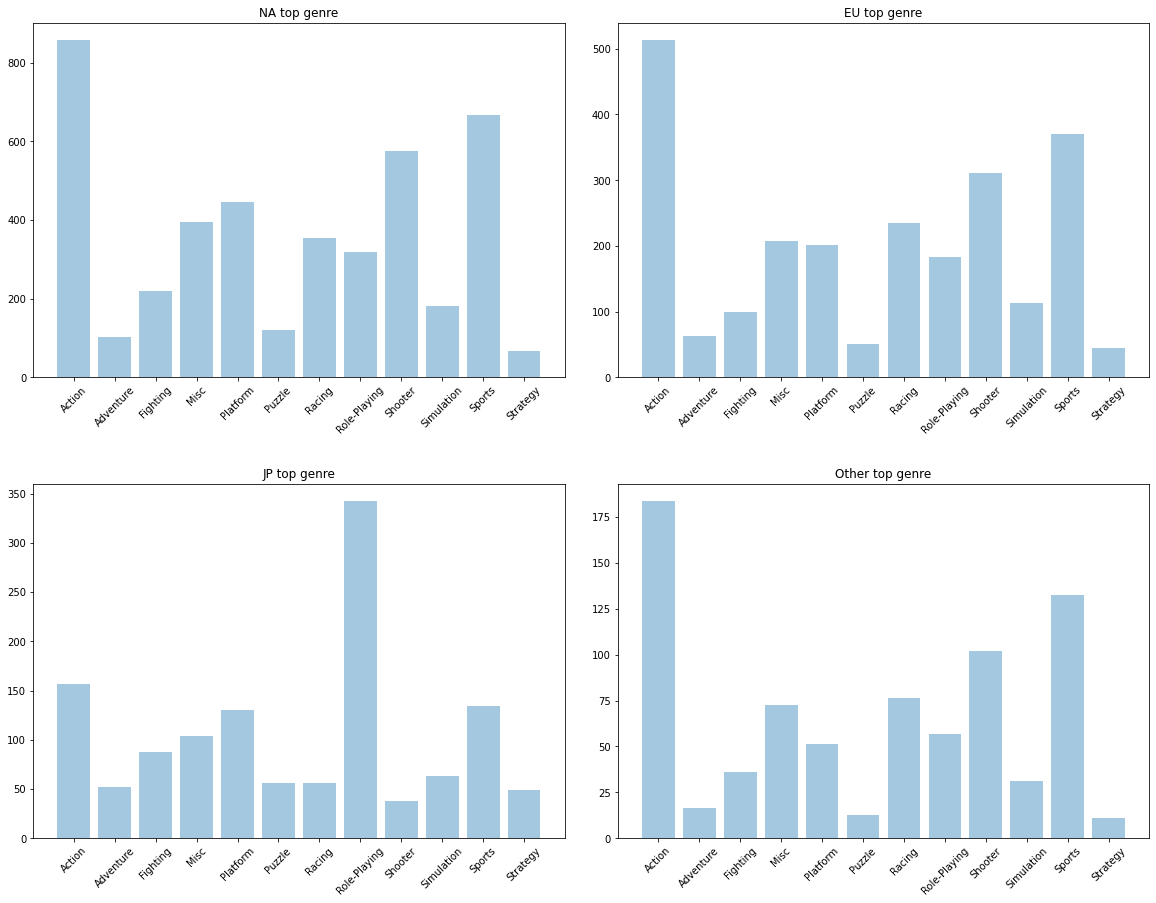

In [26]:
#sns.set(style='darkgrid')
#plt.figure(figsize=(15, 10))
#plt.title("Preferred Game Genre", fontsize=30)
#plt.xlabel("Genre of game", fontsize=20)
#plt.ylabel("Sales", fontsize=20)
##sns.barplot(x='Genre',y='EU_Sales',data=df_genre1);
#sns.lineplot(x='Genre',y='NA_Sales',data=df_genre);
#sns.lineplot(x='Genre',y='JP_Sales',data=df_genre);
#sns.lineplot(x='Genre',y='Other_Sales',data=df_genre);
#sns.lineplot(x='Genre',y='Total_Sales',data=df_genre);
#sns.lineplot(data=df_genre,markers=True);

f, axes =plt.subplots(2,2)
f.set_size_inches((20, 15))
#plt.setp(plt.xticks()[1], rotation=45)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

axes[0,0].bar(df_genre1['Genre'],df_genre1['NA_Sales'],alpha = 0.4,)
axes[0, 0].set_title('NA top genre', fontsize = 12)
axes[0,1].bar(df_genre1['Genre'],df_genre1['EU_Sales'],alpha = 0.4)
axes[0, 1].set_title('EU top genre', fontsize = 12)
axes[1,0].bar(df_genre1['Genre'],df_genre1['JP_Sales'],alpha = 0.4)
axes[1, 0].set_title('JP top genre', fontsize = 12)
axes[1,1].bar(df_genre1['Genre'],df_genre1['Other_Sales'],alpha = 0.4)
axes[1, 1].set_title('Other top genre', fontsize = 12)
plt.show()

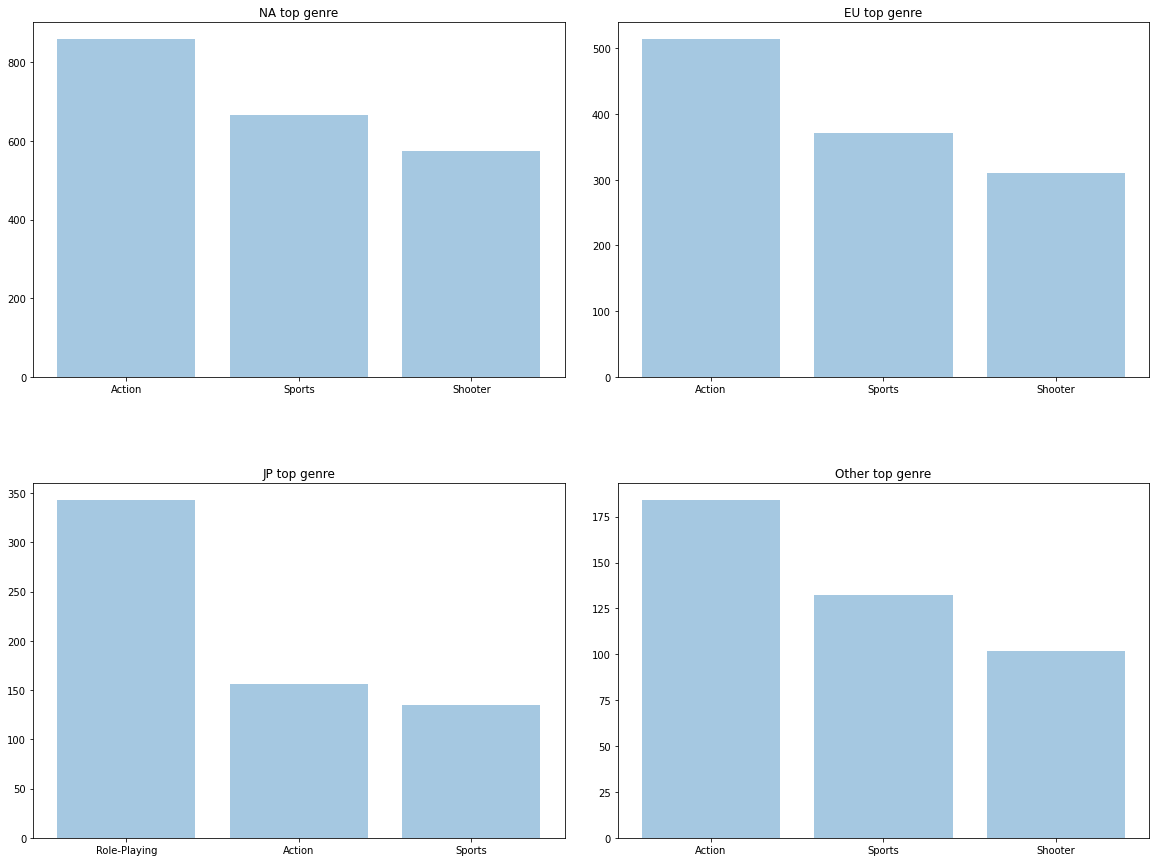

In [27]:
f, axes =plt.subplots(2,2)
# 격자 크기 설정
f.set_size_inches((20, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

axes[0,0].bar(df_top_genre_na['Genre'],df_top_genre_na['NA_Sales'],alpha = 0.4)
axes[0, 0].set_title('NA top genre', fontsize = 12)
axes[0,1].bar(df_top_genre_eu['Genre'],df_top_genre_eu['EU_Sales'],alpha = 0.4)
axes[0, 1].set_title('EU top genre', fontsize = 12)
axes[1,0].bar(df_top_genre_jp['Genre'],df_top_genre_jp['JP_Sales'],alpha = 0.4)
axes[1, 0].set_title('JP top genre', fontsize = 12)
axes[1,1].bar(df_top_genre_ot['Genre'],df_top_genre_ot['Other_Sales'],alpha = 0.4)
axes[1, 1].set_title('Other top genre', fontsize = 12)
plt.show()

`판매량 집계`
*   전체적으로 1위는 액션, 2위는 스포츠, 3위는 슈팅
*   북미, 유럽, 그 외  - 액션, 스포츠
*   일본 - 롤플레잉



In [47]:
df_genre

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,513.64,156.60,858.75,183.99,1712.98
Adventure,63.66,51.87,101.79,16.70,234.02
Fighting,99.90,87.14,220.35,36.15,443.54
Misc,208.15,104.18,394.73,72.64,779.70
Platform,200.63,130.53,445.38,51.45,827.99
Puzzle,50.47,56.24,121.58,12.44,240.73
Racing,235.02,56.32,354.70,76.51,722.55
Role-Playing,183.09,342.93,318.76,56.73,901.51
Shooter,310.23,38.18,574.48,101.86,1024.75


In [43]:
# 상관분석 (공분산)
df_corr = df_genre.corr()
df_corr

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total_Sales
EU_Sales,1.000000,0.278428,0.986484,0.994272,0.980855
JP_Sales,0.278428,1.000000,0.285377,0.263562,0.442831
NA_Sales,0.986484,0.285377,1.000000,0.974401,0.982819
Other_Sales,0.994272,0.263562,0.974401,1.000000,0.970777
Total_Sales,0.980855,0.442831,0.982819,0.970777,1.000000


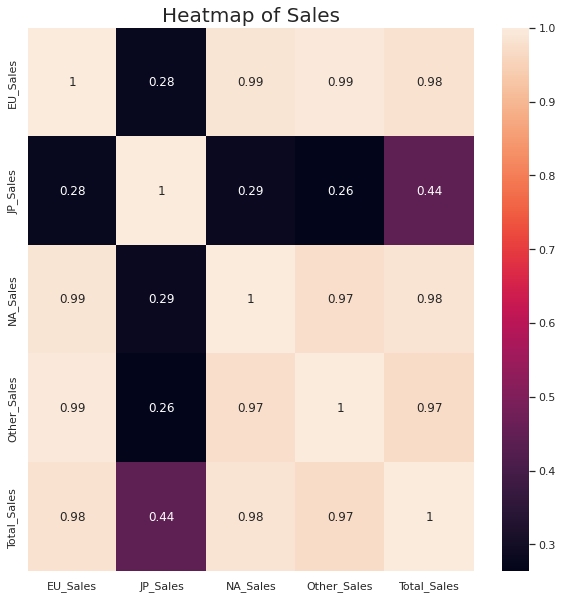

In [45]:
ax = sns.heatmap(df_corr,annot=True)
sns.set(rc = {'figure.figsize':(10,10)})
plt.title('Heatmap of Sales', fontsize=20)
plt.show();

`결과 분석`
*   공분산과 공분산을 통한 히트맵을 살펴보면 NA_Sales,EU_Sales,Other_Sales 의 장르별 분포가 거의 동일함을 볼수있다. 
*   일본의 경우에만 다른 지역과는 다른 분포를 보인다. 

`결론` 
* 일본 제외 타지역과 일본은 선호하는 게임장르가 다르다. 
*but 일본 제외 타지역들의 서로서로는 선호하는 게임장르가 같다고 보인다.
* 다음 분기 게임 설계에서 일본지역 전략과 타지역 전략을 다르게 세워야 된다고 생각됨


# 연도별 게임의 트렌드가 있을까?

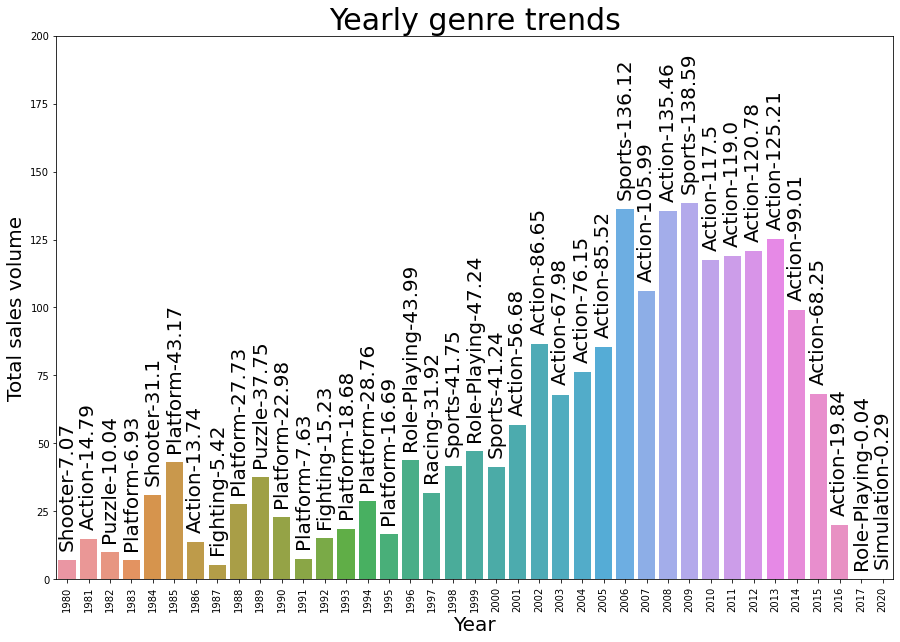

In [31]:
year_genre_dx = df_clean.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_genre = year_genre_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_genre_dx['Total_Sales']
year_genre_max = year_genre_dx[year_genre].reset_index(drop=True)

genre = year_genre_max['Genre']

plt.figure(figsize=(15, 10))
g = sns.barplot(x='Year', y='Total_Sales', data=year_genre_max)
#g = sns.lineplot(data=year_sale_max, markers=True);
index = 0
for value in year_genre_max['Total_Sales']:
    g.text(index, value + 5, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly genre trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
plt.ylim(0,200)

plt.xticks(rotation=90)
plt.show()

`년도별 장르 트렌드`
*   2000년대 이후 게임시장이 활성화 되면서 전반적으로 판매량이 늘어남
*   거의 매년 액션장르의 게임이 가장 인기가 많았음
*   2000년대 이후를 주목한다면 액션장르가 1등을 하지 못한 경우는 스포츠 장르가 1등을 기록함
*   4년마다의 월드컵이 이에 영향이 있을 것으로 예상됨 




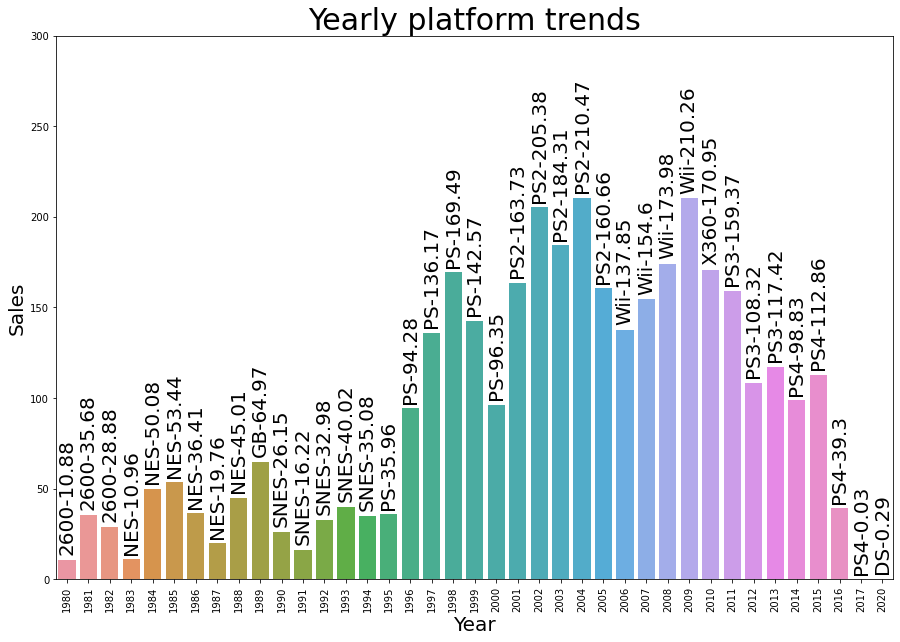

In [32]:
year_platform_dx = df_clean.groupby(by=['Year', 'Platform'])['Total_Sales'].sum().reset_index()
year_platform = year_platform_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_platform_dx['Total_Sales']
year_platform_max = year_platform_dx[year_platform].reset_index(drop=True)

platform = year_platform_max['Platform']

plt.figure(figsize=(15, 10))
g = sns.barplot(x='Year', y='Total_Sales', data=year_platform_max)
#g = sns.lineplot(data=year_sale_max, markers=True);
index = 0
for value in year_platform_max['Total_Sales']:
    g.text(index, value + 5, str(platform[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly platform trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.ylim(0,300)

plt.xticks(rotation=90)
plt.show()

In [28]:
df_Platform = df_clean.groupby(by=['Platform'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 플렛폼
df_Platform = df_Platform.reset_index()

df_Platform_na = df_clean.groupby(by=['Platform'])['NA_Sales'].sum() # 북미 선호하는 게임 플렛폼
df_Platform_na = df_Platform_na.reset_index()

df_Platform_eu = df_clean.groupby(by=['Platform'])['EU_Sales'].sum() # 유럽 선호하는 게임 플렛폼
df_Platform_eu = df_Platform_eu.reset_index()

df_Platform_jp = df_clean.groupby(by=['Platform'])['JP_Sales'].sum() # 일본 선호하는 게임 플렛폼
df_Platform_jp = df_Platform_jp.reset_index()

df_Platform_ot = df_clean.groupby(by=['Platform'])['Other_Sales'].sum() # 일본 선호하는 게임 플렛폼
df_Platform_ot = df_Platform_ot.reset_index()

In [29]:
df_top_Platform_na = df_Platform_na.sort_values(by='NA_Sales',ascending=False)
df_top_Platform_na = df_top_Platform_na.head(3)

df_top_Platform_eu = df_Platform_eu.sort_values(by='EU_Sales',ascending=False)
df_top_Platform_eu = df_top_Platform_eu.head(3)

df_top_Platform_jp = df_Platform_jp.sort_values(by='JP_Sales',ascending=False)
df_top_Platform_jp = df_top_Platform_jp.head(3)

df_top_Platform_ot = df_Platform_ot.sort_values(by='Other_Sales',ascending=False)
df_top_Platform_ot = df_top_Platform_ot.head(3)

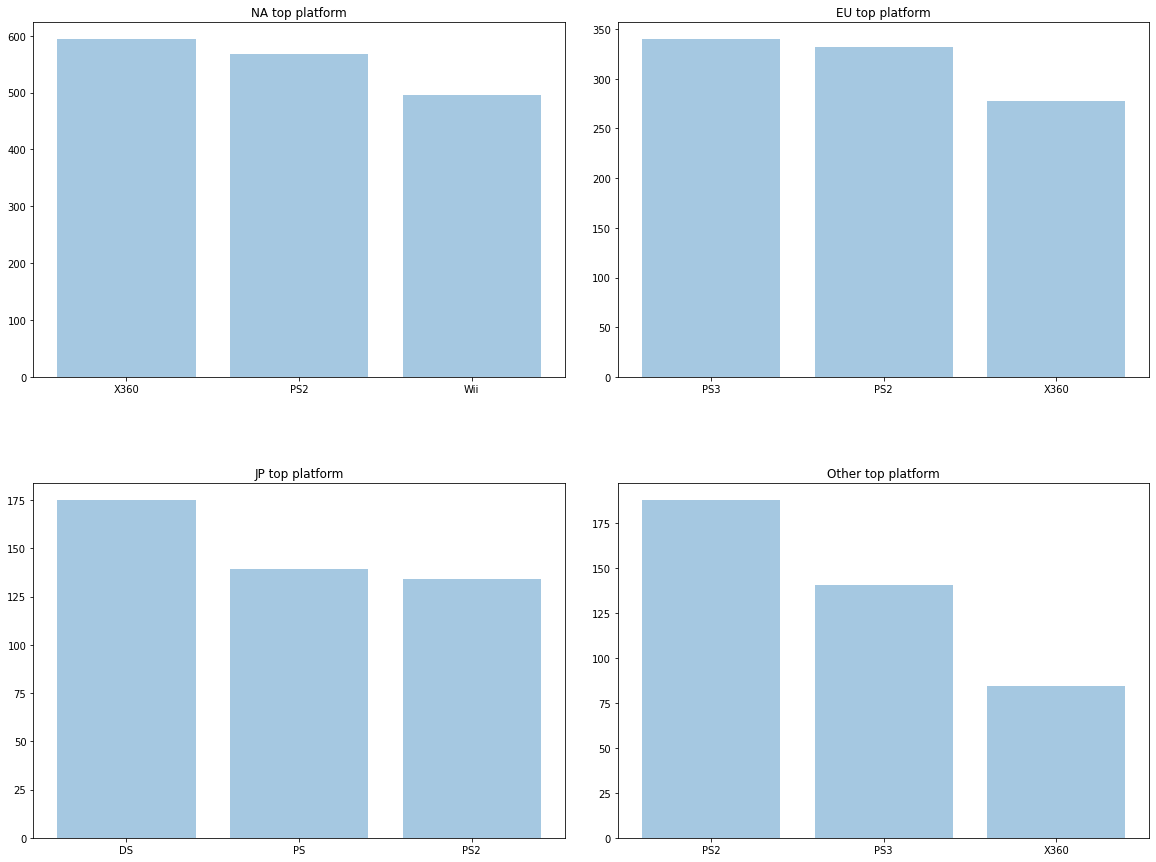

In [30]:
f, axes =plt.subplots(2,2)
# 격자 크기 설정
f.set_size_inches((20, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

axes[0,0].bar(df_top_Platform_na['Platform'],df_top_Platform_na['NA_Sales'],alpha = 0.4)
axes[0, 0].set_title('NA top platform', fontsize = 12)
axes[0,1].bar(df_top_Platform_eu['Platform'],df_top_Platform_eu['EU_Sales'],alpha = 0.4)
axes[0, 1].set_title('EU top platform', fontsize = 12)
axes[1,0].bar(df_top_Platform_jp['Platform'],df_top_Platform_jp['JP_Sales'],alpha = 0.4)
axes[1, 0].set_title('JP top platform', fontsize = 12)
axes[1,1].bar(df_top_Platform_ot['Platform'],df_top_Platform_ot['Other_Sales'],alpha = 0.4)
axes[1, 1].set_title('Other top platform', fontsize = 12)
plt.show()

`년도별 플렛폼 트랜드`
*   1995년부터 PlayStation이 보급되면서 시장을 장악
*   이후 잠시 Wii가 플렛폼 1위를 가져감
*   그러나 다시 PlayStation의 새로운 모델들이 나오면서 계속해서 PlayStation이 최고의 플랫폼으로 보여짐
*   일본은 닌텐도의 플렛폼인 DS가 1위플렛폼을 차지




# 지역별로 출고량이 높은 게임은?

In [33]:
sortdf = df_clean.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(10)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


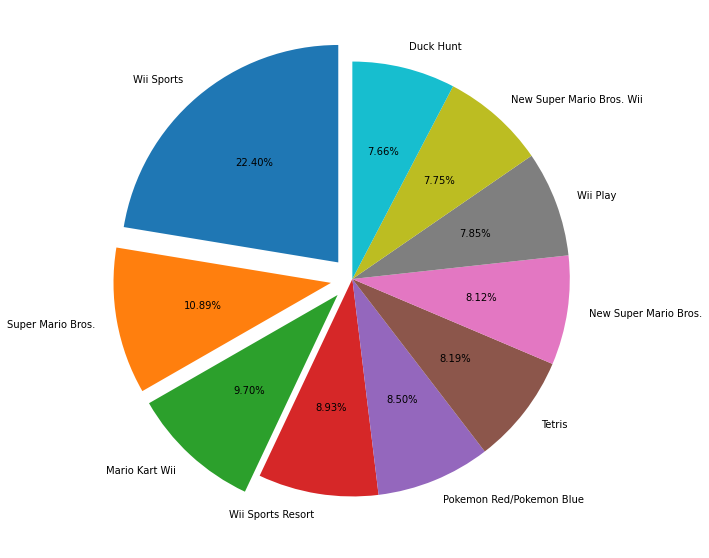

In [34]:
group_name = top_game_sale.Name
group_size = top_game_sale['Total_Sales']
group_explode = (0.0,0.0,0.0)
fig = plt.figure(figsize=(10,10))
exp = [0.1, 0.1, 0.1, 0,0,0,0,0,0,0]
plt.pie(group_size,labels = group_name, startangle=90,autopct='%.2f%%',explode=exp);

In [35]:
sortdf = df_clean.sort_values(by=['NA_Sales'], ascending=False)
top_NA_sale = sortdf.head(10)
top_NA_sale = top_NA_sale[['Name', 'Year', 'Genre', 'NA_Sales']]
top_NA_sale = top_NA_sale.reset_index(drop=True)

sortdf = df_clean.sort_values(by=['EU_Sales'], ascending=False)
top_EU_sale = sortdf.head(10)
top_EU_sale = top_EU_sale[['Name', 'Year', 'Genre', 'EU_Sales']]
top_EU_sale = top_EU_sale.reset_index(drop=True)

sortdf = df_clean.sort_values(by=['JP_Sales'], ascending=False)
top_JP_sale = sortdf.head(10)
top_JP_sale = top_JP_sale[['Name', 'Year', 'Genre', 'JP_Sales']]
top_JP_sale = top_JP_sale.reset_index(drop=True)

sortdf = df_clean.sort_values(by=['Other_Sales'], ascending=False)
top_OT_sale = sortdf.head(10)
top_OT_sale = top_OT_sale[['Name', 'Year', 'Genre', 'Other_Sales']]
top_OT_sale = top_OT_sale.reset_index(drop=True)

In [36]:
group_name_NA = top_NA_sale.Name
group_size_NA = top_NA_sale['NA_Sales']

group_name_EU = top_EU_sale.Name
group_size_EU = top_EU_sale['EU_Sales']

group_name_JP = top_JP_sale.Name
group_size_JP = top_JP_sale['JP_Sales']

group_name_OT = top_OT_sale.Name
group_size_OT = top_OT_sale['Other_Sales']

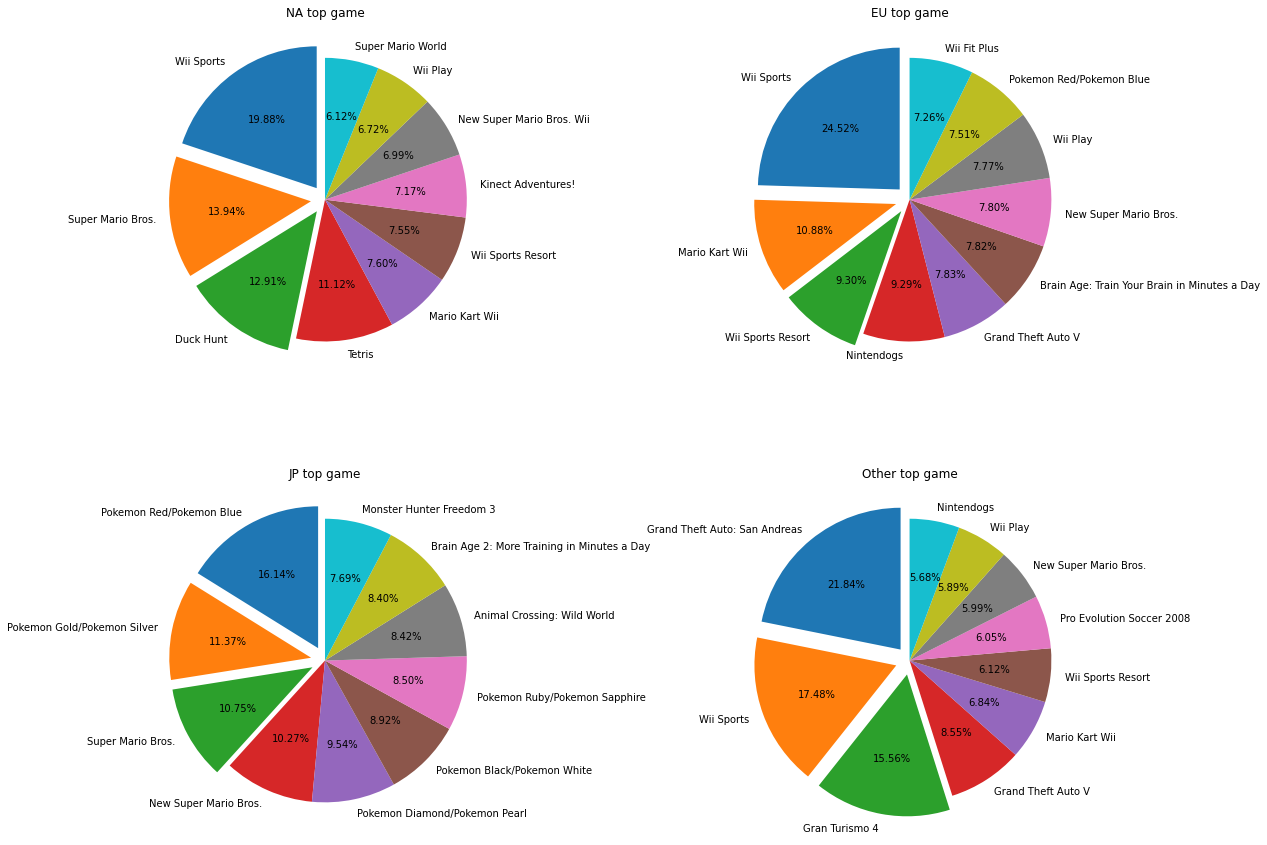

In [37]:
f, axes =plt.subplots(2,2)
# 격자 크기 설정
f.set_size_inches((20, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

axes[0,0].pie(group_size_NA,labels = group_name_NA, startangle=90,autopct='%.2f%%',explode=exp)
axes[0, 0].set_title('NA top game', fontsize = 12)
axes[0,1].pie(group_size_EU,labels = group_name_EU, startangle=90,autopct='%.2f%%',explode=exp)
axes[0, 1].set_title('EU top game', fontsize = 12)
axes[1,0].pie(group_size_JP,labels = group_name_JP, startangle=90,autopct='%.2f%%',explode=exp)
axes[1, 0].set_title('JP top game', fontsize = 12)
axes[1,1].pie(group_size_OT,labels = group_name_OT, startangle=90,autopct='%.2f%%',explode=exp)
axes[1, 1].set_title('Other top game', fontsize = 12)
plt.show()

`지역별 출고량 높은 게임`
*   거의 대부분의 지역이 액션장르를 가장 선호하는것으로 나타났었는데 실제 게임별 출고량을 보면 그렇지 않다. </br> -> GTA 시리즈가 액션장르의 대부분을 점유하는데 시리즈 종류가 많아서 개별로 나누어진 출고량은 top 10안에 들지 못했다.
</br>-> GTA 시리즈는 PlayStation 에서 가장 많이 팔렸지만 이는 PlayStation이 1등 플렛폼이기 때문으로 보이고 GTA시리즈 자체는 독점 ip가 아니므로 플렛폼에 구애받지 않는다고 여겨짐.
*   일본지역 top8 까지의 게임이 모두 Nintendo 계열 플렛폼의 게임이다. </br> -> 일본지역은 Nintendo 계열 플렛폼에 충성도가 높음.



# **Part 3. 결론**

`결론`
*   일본지역 게임 설계 전략과 그 외 지역(NA,EU,Other) 설계 전략을 따로 둔다.

*   일본지역은 Nintendo 계열 플렛폼에 충성도가 높고 롤플레잉 장르의 게임이 인기가 많다. </br>
 -> Nintendo 플랫폼을 활용한 Role-Palying 장르의 게임
*   그 외 지역(NA,EU,Other)은 PlayStation 플렛폼의 점유율이 가장 높고 액션, 스포츠 장르의 게임이 인기가 많다. 
*   전체적으로 판매량이 급등한 2000년대 이후로 2006년 과 2009 년의 최고 장르가 스포츠인것으로 보아 4년마다 열리는 월드컵의 영향이 있을 것으로 보인다. 

*   게임사는 높은 판매량을 기록해야 한다. 액션 장르는 확실히 1위 장르이지만 출고량 랭킹에서는 찾기 힘들었다. 이는 GTA 시리즈가 액션 장르의 대부분을 가지고 있었기 때문이다. 
*   성공이 보장된 전작이 존재하는 시리즈 게임을 제작할시 GTA 시리즈와 유사한 엑션 장르 게임을 제작하는 것도 나쁘진 않지만 게임 하나를 제작하는 회사 입장에서는 판매량이 보다 고르게 분포되어 있고, 2위 장르였던 스포츠 장르를 선택하는 것이 더 좋다고 여겨짐. 
*   또한 2022년은 월드컵이 열리는 해 이므로 스포츠 장르를 택해야하는 이유에 좀 더 설득력을 준다. 
</br> -> NA,EU,Other 지역에는 PlayStation 기반의 스포츠 장르의 게임

